NYC AIRBNB DATA ANALYSIS PROJECT

In [1]:
!pip install --upgrade bottleneck
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade matplotlib.pyplot
!pip install --upgrade seaborn

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
sns.set(style="whitegrid")

Enabling inline plotting

In [4]:
%matplotlib inline

In [7]:
# Loading the Dataset
File_path = '/content/AB_NYC_2019.csv'

try:
    df = pd.read_csv(File_path)
    print('Dataset Loaded successfully')
except FileNotFoundError:
    print(f'File not found at {File_path}. Please check the path.')

Dataset Loaded successfully


In [8]:
print("\n First 5 rows of the dataset")
display(df.head())


 First 5 rows of the dataset


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
print("\n Dataset Dimensions:")
display(f"Rows: {df.shape[0]},Columns: {df.shape[1]}")


 Dataset Dimensions:


'Rows: 48852,Columns: 16'

In [10]:
print("\n Column Names:")
print(df.columns.tolist())


 Column Names:
['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [11]:
print("\n Dataset Info")
df.info()


 Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48852 entries, 0 to 48851
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48852 non-null  int64  
 1   name                            48852 non-null  object 
 2   host_id                         48852 non-null  int64  
 3   host_name                       48831 non-null  object 
 4   neighbourhood_group             48852 non-null  object 
 5   neighbourhood                   48852 non-null  object 
 6   latitude                        48852 non-null  float64
 7   longitude                       48852 non-null  float64
 8   room_type                       48852 non-null  object 
 9   price                           48852 non-null  int64  
 10  minimum_nights                  48852 non-null  int64  
 11  number_of_reviews               48852 non-null  int64  
 12  last_review      

Data Cleaning and missing values

In [12]:
print("\n Missing values:")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_df[missing_df['Missing Values'] > 0])


 Missing values:
             Missing Values  Percentage
host_name                21    0.042987
last_review           10033   20.537542


Fill or Drop Missing Data

In [13]:
df['reviews_per_month'].fillna(0, inplace=True)
df.dropna(subset=['name'], inplace=True)
print("\n Cleaning: Filling 'reviews_per_month' with 0 and dropping rows with missing 'name'")


 Cleaning: Filling 'reviews_per_month' with 0 and dropping rows with missing 'name'


Drop duplicates

In [14]:
before_dedup = df.shape[0]
df.drop_duplicates(inplace=True)
after_dedup = df.shape[0]
print(f"\n Removed {before_dedup - after_dedup} duplicate rows.")


 Removed 0 duplicate rows.


Data Types & Conversion

In [15]:
print("\n Checking Data Types:")
print(df.dtypes)


 Checking Data Types:
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


Convert 'last_review' to datetime

In [16]:
if 'last_review' in df.columns:
    df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

Check for Outliers and Negative Values

In [17]:
print("\n Checking for Negative Values:")
for col in ['price', 'minimum_nights', 'number_of_reviews', 'availability_365']:
    if (df[col] < 0).any():
        print(f"Column '{col}' contains negative values!")
    else:
        print(f"Column '{col}' is clean (no negative values).")


 Checking for Negative Values:
Column 'price' is clean (no negative values).
Column 'minimum_nights' is clean (no negative values).
Column 'number_of_reviews' is clean (no negative values).
Column 'availability_365' is clean (no negative values).


Filter unrealistic values

In [18]:
print("\n Removing listings with unrealistic prices or minimum nights")
df = df[(df['price'] > 0) & (df['price'] < 10000)]
df = df[df['minimum_nights'] <= 365]


 Removing listings with unrealistic prices or minimum nights


Unique Values Summary

In [19]:
print("\n Unique Values in Categorical Columns:")
for col in ['neighbourhood_group', 'neighbourhood', 'room_type']:
    print(f"{col}: {df[col].nunique()} unique values")


 Unique Values in Categorical Columns:
neighbourhood_group: 5 unique values
neighbourhood: 221 unique values
room_type: 3 unique values


Summary Statistics

In [20]:
print("\n Summary Statistics:")
display(df.describe(include='all'))


 Summary Statistics:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.885200e+04,48852,4.885200e+04,48831,48852,48852,48852.000000,48852.000000,48852,48852.000000,48852.000000,48852.000000,38819,48852.000000,48852.000000,48852.000000
unique,NaN,47880,NaN,11446,5,221,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,18,NaN,417,21645,3915,NaN,NaN,25390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.902188e+07,NaN,6.764087e+07,NaN,NaN,NaN,40.728946,-73.952172,NaN,152.161426,6.839290,23.284697,2018-10-04 07:12:34.053427456,1.091449,7.148448,112.746418
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,10.000000,1.000000,0.000000,2011-03-28 00:00:00,0.000000,1.000000,0.000000
25%,9.474428e+06,NaN,7.815342e+06,NaN,NaN,NaN,40.690080,-73.983072,NaN,69.000000,1.000000,1.000000,2018-07-09 00:00:00,0.040000,1.000000,0.000000
50%,1.968164e+07,NaN,3.079915e+07,NaN,NaN,NaN,40.723080,-73.955690,NaN,106.000000,3.000000,5.000000,2019-05-19 00:00:00,0.370000,1.000000,45.000000
75%,2.915784e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763120,-73.936290,NaN,175.000000,5.000000,24.000000,2019-06-23 00:00:00,1.582500,2.000000,227.000000
max,3.648724e+07,NaN,2.743213e+08,NaN,NaN,NaN,40.913060,-73.712990,NaN,9999.000000,365.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000


Save Cleaned Data for Analysis

In [21]:
df.to_csv(r"C:\Users\Admin\Desktop\mk01\AB_NYC_2019.csv", index=False)
print(" Cleaned data saved for analysis. Proceed to visualization and modeling.")

 Cleaned data saved for analysis. Proceed to visualization and modeling.


**VISUALIZATION**

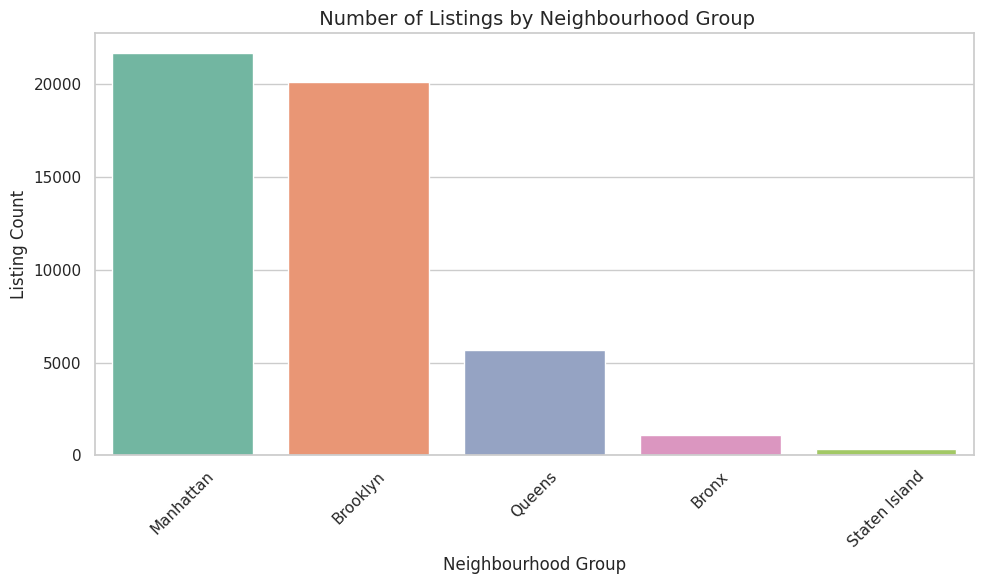

In [22]:
# Number of Listings by Neighbourhood Group
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='neighbourhood_group', order=df['neighbourhood_group'].value_counts().index, palette='Set2')
plt.title(' Number of Listings by Neighbourhood Group', fontsize=14)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Listing Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

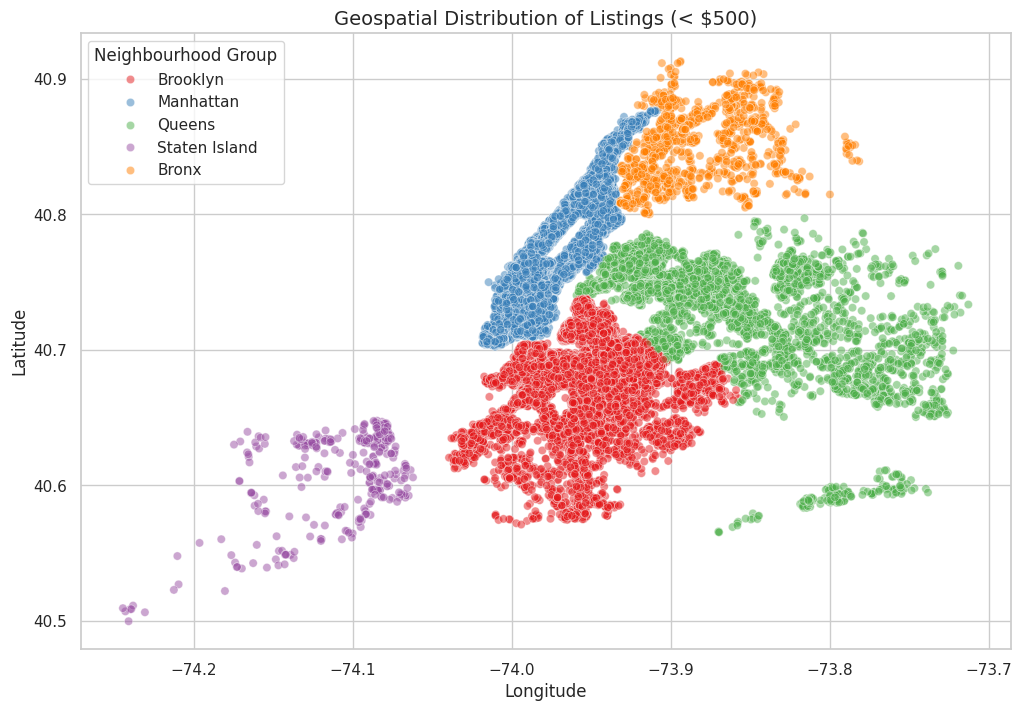

In [23]:
# Geospatial Distribution of Listings
plt.figure(figsize=(12,8))
sns.scatterplot(data=df[df['price'] < 500], x='longitude', y='latitude', hue='neighbourhood_group', palette='Set1', alpha=0.5)
plt.title('Geospatial Distribution of Listings (< $500)', fontsize=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighbourhood Group')
plt.show()

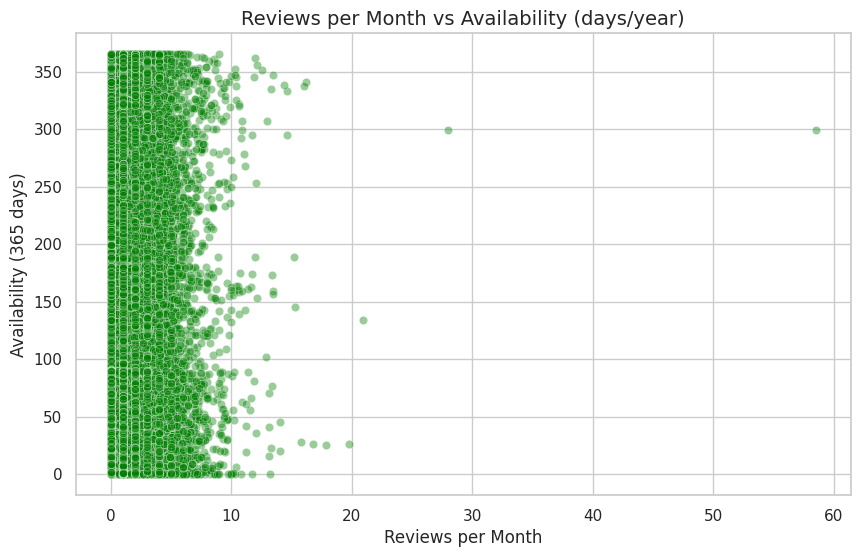

In [24]:
# Reviews per Month vs Availability
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='reviews_per_month', y='availability_365', alpha=0.4, color='green')
plt.title('Reviews per Month vs Availability (days/year)', fontsize=14)
plt.xlabel('Reviews per Month')
plt.ylabel('Availability (365 days)')
plt.show()

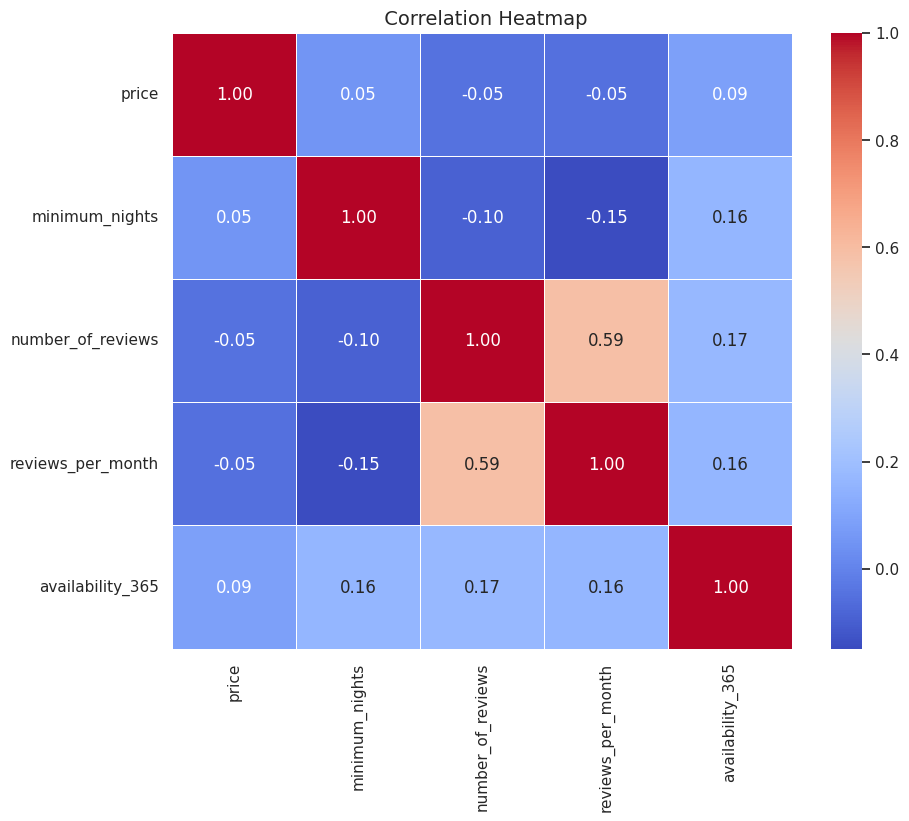

In [25]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(' Correlation Heatmap', fontsize=14)
plt.show()

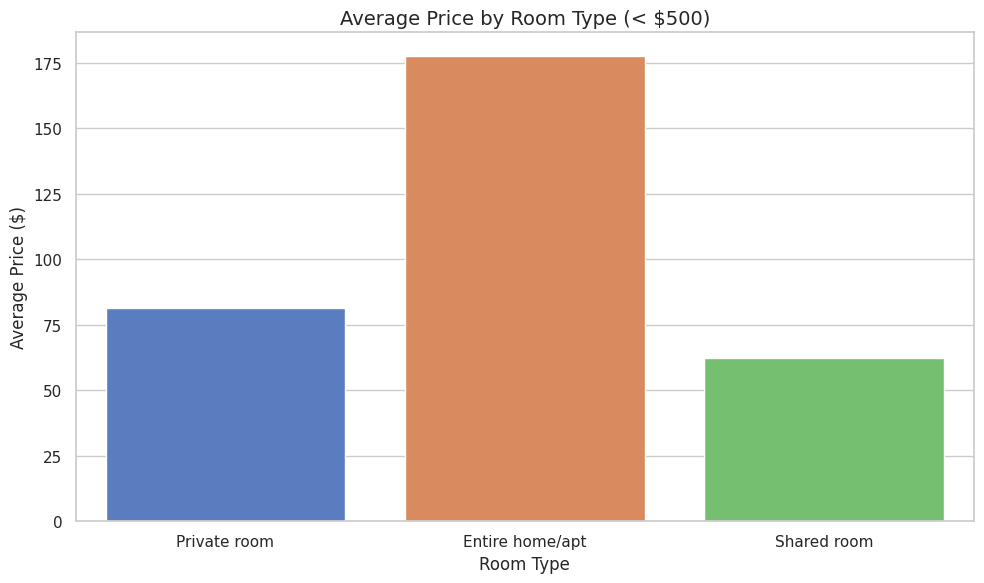

In [26]:
# Average Price by Room Type
plt.figure(figsize=(10,6))
sns.barplot(x='room_type', y='price', data=df[df['price'] < 500], estimator=np.mean, ci=None, palette='muted')
plt.title('Average Price by Room Type (< $500)', fontsize=14)
plt.ylabel('Average Price ($)')
plt.xlabel('Room Type')
plt.tight_layout()
plt.show()

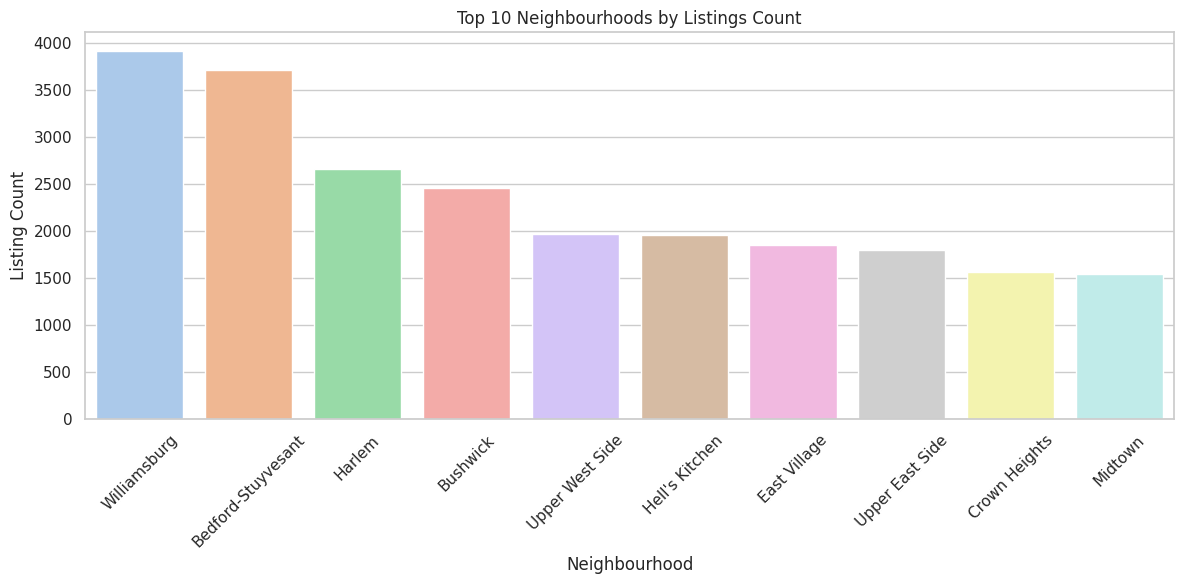

In [27]:
# Listings Count by Neighbourhood (Top 10)
top_neighbourhoods = df['neighbourhood'].value_counts().nlargest(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_neighbourhoods.index, y=top_neighbourhoods.values, palette='pastel')
plt.title('Top 10 Neighbourhoods by Listings Count')
plt.ylabel('Listing Count')
plt.xlabel('Neighbourhood')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Final Summary

In [28]:
print("\n Data Analysis Complete: The dataset has been cleaned, visualized, and explored. You may proceed to modeling, storytelling, or reporting.")


 Data Analysis Complete: The dataset has been cleaned, visualized, and explored. You may proceed to modeling, storytelling, or reporting.


**DATA MODELING**

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [30]:
df_model = df[['neighbourhood_group', 'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'price']].copy()

In [31]:
# One-hot encode categorical features
df_model = pd.get_dummies(df_model, columns=['neighbourhood_group', 'room_type'], drop_first=True)

In [32]:
X = df_model.drop('price', axis=1)
y = df_model['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Model Evaluation

In [33]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n Model Evaluation Results:")
print(f" Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f" R² Score: {r2:.4f}")


 Model Evaluation Results:
 Root Mean Squared Error (RMSE): 210.92
 R² Score: 0.1081


In [34]:
comparison_df = pd.DataFrame({"Actual Price": y_test, "Predicted Price": y_pred})
print("\n Sample Predictions:")
display(comparison_df.head())


 Sample Predictions:


,Actual Price,Predicted Price
7762,175,84.562016
23884,40,90.990313
28651,277,213.696778
23734,37,62.799907
15142,40,61.206467


Save Requirements File

In [35]:
import os
req_path = "../requirements.txt"
os.system(f"pip freeze > {req_path}")
print("requirements.txt file generated.")

requirements.txt file generated.


Generate README.md Template

In [36]:
readme_content = '''
# NYC Airbnb Price Analysis

This project performs detailed data preprocessing, visualization, and price prediction for NYC Airbnb listings using Linear Regression.

## Dataset
- *Source*: Kaggle – NYC Airbnb Open Data (2019)
- *URL*: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

## Preprocessing
- Removed nulls and duplicates
- Converted dates
- Handled outliers and categorical encoding

## EDA Highlights
- Distribution of prices, availability, and locations
- Top neighborhoods and room types

## Model
- Linear Regression
- RMSE and R² evaluation

## Files
- AB_NYC_2019_cleaned.csv
- requirements.txt
- notebook.ipynb

## Usage
bash
pip install -r requirements.txt
jupyter notebook notebook.ipynb


## Author
Built by [Tanmay Kunjir] | [GitHub Profile]
'''

with open("../README.md", "w") as f:
    f.write(readme_content)

print(" README.md file generated.")
print(" Project complete. You can now push this project to GitHub!")

 README.md file generated.
 Project complete. You can now push this project to GitHub!
